# Analizamos la F1

Última carrera del mundial 2021. Después de la caótica carrera en Arabia Saudita, la temporada de Fórmula 1 llegó a su fin en los Emiratos Árabes Unidos, y Sir Lewis Hamilton y Max Verstappen realizaron una batalla histórica que en este notebook analizaremos paso por paso en su última vuelta al circuito de **Yas Marina**



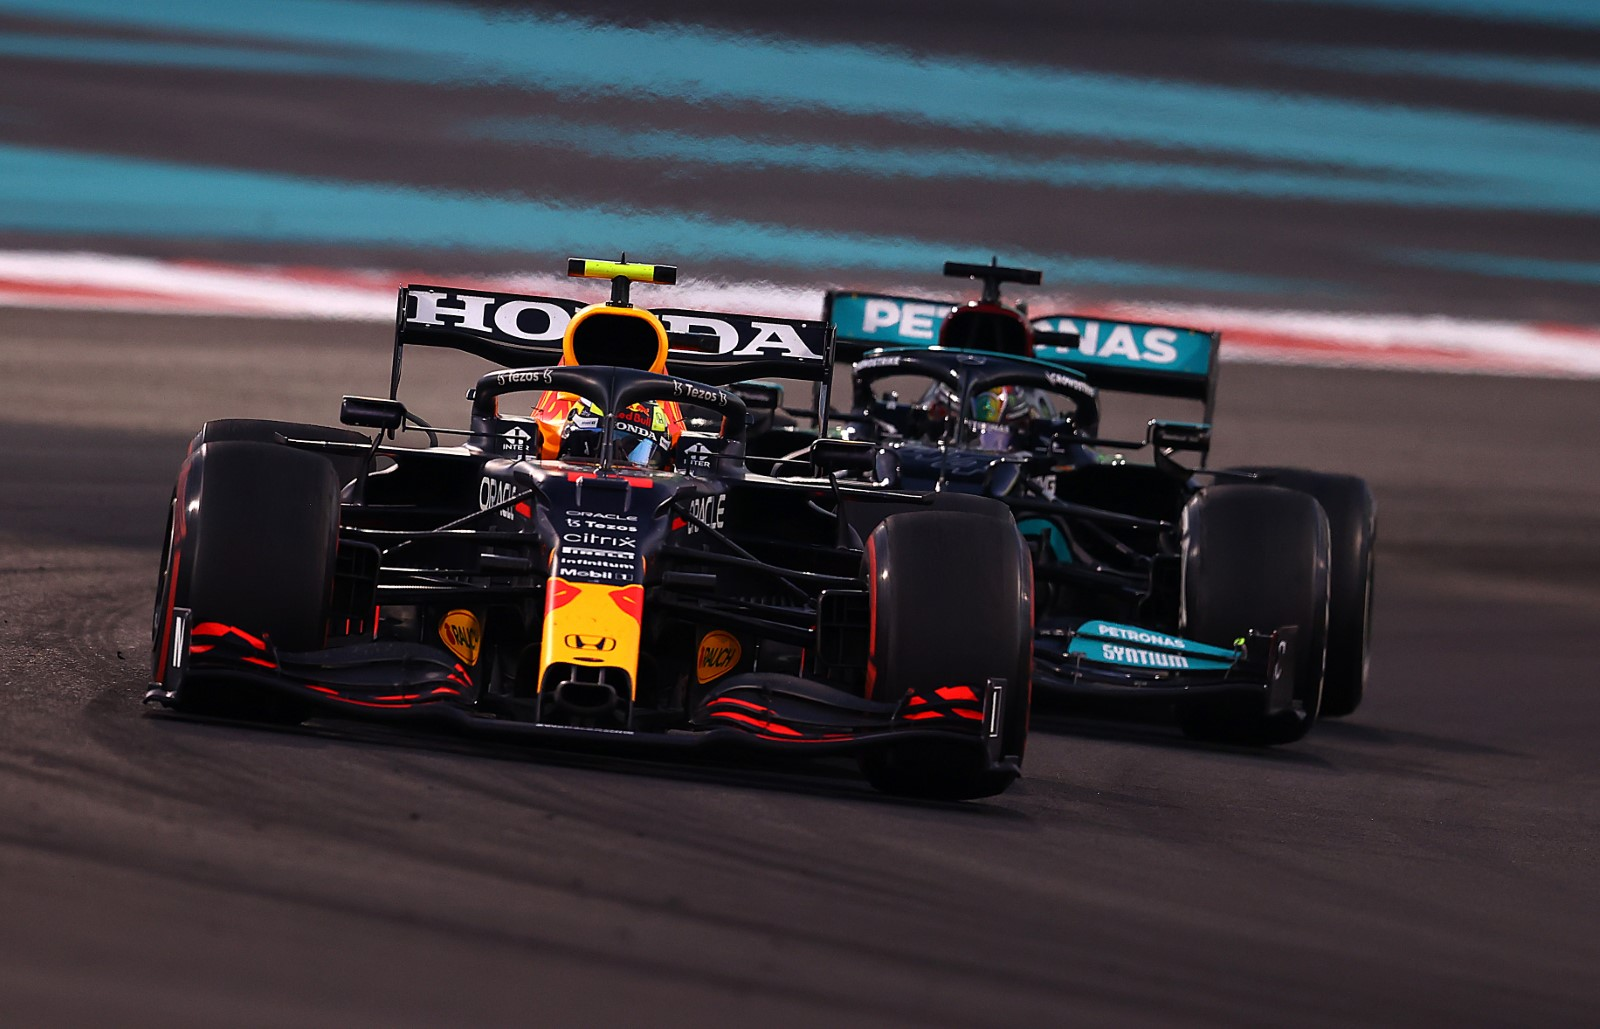
* Fuente: https://www.motorsportweek.com/

### Contexto
Con esta practica mostramos la importancia de los datos cuando pueden ser recogidos y analizados, utilizar el volumen, la variedad y la velocidad de los datos que genera el vehículo, y convertirlos en una ventaja competitiva

La Fórmula Uno es uno de los deportes más competitivos y en los que mayor cantidad de tecnología se utiliza en el mundo.

### Objetivo
Utilizaremos el lenguaje **Python** para analizar la telemetría de los dos pilotos protagonistas. Seleccionaremos los datos de la última vuelta y veremos de una manera visual donde estuvieron las claves del adelantamiento de Verstapen a Hamilton o la imposibilidad de este para superarle en velocidad punta.

#### Cargamos las librerias necesarias

In [ ]:
import fastf1 as ff1
from fastf1 import plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
import os

In [ ]:
ff1.Cache.enable_cache('C:/Users/migue/Documents/F1 Data Center/Datos/fastf1_Cache')

In [ ]:
print(dir(ff1))
print(ff1.events)

In [ ]:
# Configurar gráficos
plotting.setup_mpl()

race = ff1.events.get_session(2022, 'Turkish Grand Prix', 'R')
race.load()

In [ ]:
print(type(race))

In [ ]:
test = ff1.get_testing_session(2023,1,1)
test.load()

In [ ]:
import pickle

path = 'C:\\Users\\migue\\Documents\\F1 Data Center\\Datos\\fastf1_Cache\\2022\\2022-03-12_Pre-Season_Test\\2022-03-10_Practice_1\\timing_data.ff1pkl'
with open(path, 'rb') as f:
    data = pickle.load(f)


print(type(data))
display(data)

In [ ]:
path = 'C:\\Users\\migue\\Documents\\F1 Data Center\\Datos\\fastf1_Cache\\2022\\2022-03-12_Pre-Season_Test\\2022-03-10_Practice_1\\session_status_data.ff1pkl'
with open(path, 'rb') as f:
    data = pickle.load(f)

data.values()

In [ ]:
lec = test.laps.pick_driver('GAS')
ham = test.laps.pick_driver('HAM')

a = list(lec['LapTime'])
print(len(a))

In [ ]:
fig, ax = plt.subplots()
ax.plot(lec['LapNumber'], lec['LapTime'], color='#340db0')
ax.plot(ham['LapNumber'], ham['LapTime'], color='cyan')
ax.set_title("VER vs HAM")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plt.show()

#### Cargamos los datos de la carrera en Abu Dabi 2021
**Parametros de la sesión**
* Año
* Circuito
* Tipo de Dato
    * R: Datos de la carrera
    * Q: Datos de la clasificación

In [ ]:
# Cargar la carrera y clasificación
sprint = ff1.get_session(2022, 'Brasil', 'S')
# quali = ff1.get_session(2021, 'Yas Marina', 'Q')

#### Necesitamos cargar los datos de cada vuelta con su telemetria para el posterior análisis

In [ ]:
# Get the laps
sprint_s = sprint.load_laps()
# laps_r = race.load_laps(with_telemetry=True)
# laps_q = quali.load_laps(with_telemetry=True)

**Obtenemos la siguiente información por vuelta**

* Driver (string): Three letter driver identifier

* DriverNumber (str): Driver number

* LapTime (pandas.Timedelta): Recorded lap time. Officially deleted lap times will not be deleted here. Deleting laps is currently not supported.

* LapNumber (int): Recorded lap number

* Stint (int): Stint number

* PitOutTime (pandas.Timedelta): Session time when car exited the pit

* PitInTime (pandas.Timedelta): Session time when car entered the pit

* Sector1Time (pandas.Timedelta): Sector 1 recorded time

* Sector2Time (pandas.Timedelta): Sector 2 recorded time

* Sector3Time (pandas.Timedelta): Sector 3 recorded time

* Sector1SessionTime (pandas.Timedelta): Session time when the Sector 1 time was set

* Sector2SessionTime (pandas.Timedelta): Session time when the Sector 2 time was set

* Sector3SessionTime (pandas.Timedelta): Session time when the Sector 3 time was set

* SpeedI1 (float): Speedtrap sector 1

* SpeedI2 (float): Speedtrap sector 2

* SpeedFL (float): Speedtrap at finish line

* SpeedST (float): Speedtrap on longest straight (Not sure)

* Compound (str): Tyre compound name: SOFT, MEDIUM ..

* TyreLife (float): Laps driven on this tire (includes laps in other sessions for used sets of tires)

* FreshTyre (bool): Tyre had TyreLife=0 at stint start, i.e. was a new tire

* Team (str): Team name

* LapStartTime (pandas.Timedelta): Session time at the start of the lap

* LapStartDate (pandas.Timestamp): Timestamp at the start of the lap

* TrackStatus (str): A string that contains track status numbers for all track status that occurred during this lap. The meaning of the track status numbers is explained in fastf1.api.track_status_data(). (Currently, track status data is only implemented per lap. If a finer resolution is desired, you need to directly use the data returned by fastf1.api.track_status_data()) # TODO updated when implemented

* IsAccurate (bool): If True, the lap has passed a basic accuracy check for timing data. This does not guarantee accuracy but laps marked as inaccurate need to be handled with caution. They might contain errors which can not be spotted easily. Laps need to satisfy the following criteria to be marked as accurate:

In [ ]:
sprint_s.head()

#### Podemos obtener los datos de la vuelta más rápida de carrera

In [ ]:
fastest_lap = laps_r.pick_fastest()
print(f'Vuelta más rápida: ',fastest_lap['LapTime'])
print(f'Tipo de neumático: ',fastest_lap['Compound'])
print(f'Piloto: ',fastest_lap['Driver'])

Para comenzar con el análisis debemos seleccionar a los dos pilotos que se quiere estudiar

In [ ]:
laps_drive1 = laps_r.pick_driver('HAM')
laps_drive2 = laps_r.pick_driver('VER')

Observamos el número de vueltas que han realizado en la carrera

In [ ]:
print(laps_drive1['LapNumber'].max())
print(laps_drive2['LapNumber'].max())

### Generamos el primer gráfico
* Análisis del tiempo de carrera de ambos pilotos en el total de vueltas

In [ ]:
plt.rcParams['figure.figsize'] = [10, 6]

fig, ax = plt.subplots()
fig.suptitle(race.get_driver("HAM").name + " & "+ race.get_driver("VER").name + " comparación de tiempos")

ax.plot(laps_drive1['LapNumber'], laps_drive1['LapTime'], label='HAM')
ax.plot(laps_drive2['LapNumber'], laps_drive2['LapTime'], label='VER')
ax.set(ylabel='Tiempo de carrera', xlabel='Vueltas')
ax.legend(loc="upper center")

plt.show()

### Superposición de trazas de velocidad, frenos y aceleración de ambos pilótos en la última vuelta

* Seleccionamos los datos de nuestros pilotos en la última vuelta
* Obtenemos los datos de telemétria de ambos pilotos
* Graficamos

In [ ]:
#Seleccionamos la última vuelta de nuestros pilotos
ver_lap = laps_r.pick_driver('VER')
ham_lap = laps_r.pick_driver('HAM')

In [ ]:
ham_lastlap=ham_lap[ham_lap.LapNumber==58]
ver_lastlap=ver_lap[ver_lap.LapNumber==58]

In [ ]:
print(f'Tiempo de la útima vuelta Hamilton: ',ham_lastlap.LapTime)
print(f'Tiempo de la útima vuelta Verstappen: ',ver_lastlap.LapTime)

In [ ]:
#A continuación, obtenemos los datos de telemetría de cada vuelta. 
#Agregamos una columna "Distancia" al marco de datos de telemetría, ya que esto facilita la comparación de vueltas.
ver_tel = ver_lastlap.get_car_data().add_distance()
ham_tel = ham_lastlap.get_car_data().add_distance()

### Creamos el gráfico

In [ ]:
rbr_color = ff1.plotting.team_color('RBR')
mer_color = ff1.plotting.team_color('MER')

plt.rcParams['figure.figsize'] = [15, 15]
fig, ax = plt.subplots(3)

fig.suptitle("Fastest Race Lap Telemetry Comparison")

ax[0].plot(ver_tel['Distance'], ver_tel['Speed'], label='VER')
ax[0].plot(ham_tel['Distance'], ham_tel['Speed'], label='HAM')
ax[0].set_xlabel('Distance in m')
ax[0].set_ylabel('Speed in km/h')
ax[0].legend()

ax[1].plot(ver_tel['Distance'], ver_tel['Brake'], label='VER')
ax[1].plot(ham_tel['Distance'], ham_tel['Brake'], label='HAM')
ax[1].set_xlabel('Distance in m')
ax[1].set_ylabel('Brake')

ax[2].plot(ver_tel['Distance'], ver_tel['Throttle'], label='VER')
ax[2].plot(ham_tel['Distance'], ham_tel['Throttle'], label='HAM')
ax[2].set_xlabel('Distance in m')
ax[2].set(ylabel='Acceleration')

plt.suptitle(f"Fastest Lap Comparison \n "
             f"{race.weekend.name} {race.weekend.year} Qualifying")

plt.show()

## Referencias
* https://theoehrly.github.io/Fast-F1/#